In [1]:
#imports basicos
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

#scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Especificamente para Regressão Logística
from sklearn.linear_model import LogisticRegression
from scipy.special import expit


#Especificamente para Arvores de decisão
from sklearn import tree


#Especificamente para XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor


#**Sobre a base de dados**
[load_iris dataset - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [2]:
data=load_iris()
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris
# (0) = Iris setosa
# (1) = Iris versicolor
# (2) = Iris virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris.info()
iris.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,count
target,
0,50
1,50
2,50


#**Regressão Logística**
[LogisticRegression - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [4]:
X,y = load_iris(return_X_y = True, as_frame=True)


In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
# Considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
X_RegLog = X.loc[y.isin([0,1]),'petal width (cm)'].values
y_RegLog = y[y.isin([0,1])].values

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_RegLog, y_RegLog, test_size=0.33, random_state=42)
print('Numero de dados usados para treino:',len(X_train))
print('Numero de dados usados para teste:',len(X_test))

Numero de dados usados para treino: 67
Numero de dados usados para teste: 33


In [8]:
X_train

array([0.2, 1. , 0.4, 1.5, 1.4, 0.2, 0.4, 0.2, 0.2, 0.2, 1.2, 0.2, 0.3,
       1. , 0.2, 1. , 0.1, 0.2, 0.2, 0.3, 0.2, 0.2, 1.5, 0.3, 1.3, 0.2,
       1.3, 1.6, 1.3, 1.5, 0.6, 1.4, 1. , 0.2, 1.5, 1.5, 1.3, 1. , 0.3,
       1.3, 0.2, 1.1, 1. , 1.4, 0.1, 1.3, 1.4, 1.4, 1.5, 0.1, 0.2, 0.2,
       1.5, 0.4, 0.2, 0.5, 1.3, 1.4, 1.3, 1.5, 1.2, 0.2, 1. , 1.3, 0.2,
       1.2, 1.5])

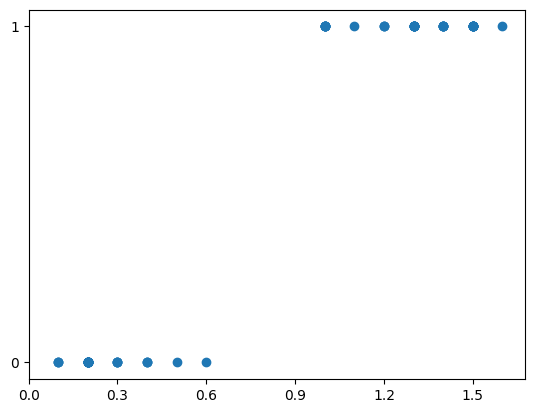

In [9]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [10]:
# Criando o nosso classificador
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

Neste primeiro momento estamos trabalhando com Regressão Logística Binária, neste caso a função de probabilidade é dada por:

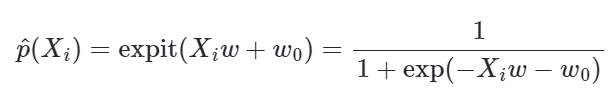


In [11]:
# Verificando o coeficiente angular
w1 = clf.coef_[0][0]
print('coeficiente angular =',w1)

# E o coeficiente linear
w0 = clf.intercept_[0]
print('coeficiente linear =',w0)

coeficiente angular = 3.8510361317501483
coeficiente linear = -2.8324818985056455


In [12]:
valores_x = np.linspace(X_train.min(),X_train.max(),100)
valores_x

array([0.1       , 0.11515152, 0.13030303, 0.14545455, 0.16060606,
       0.17575758, 0.19090909, 0.20606061, 0.22121212, 0.23636364,
       0.25151515, 0.26666667, 0.28181818, 0.2969697 , 0.31212121,
       0.32727273, 0.34242424, 0.35757576, 0.37272727, 0.38787879,
       0.4030303 , 0.41818182, 0.43333333, 0.44848485, 0.46363636,
       0.47878788, 0.49393939, 0.50909091, 0.52424242, 0.53939394,
       0.55454545, 0.56969697, 0.58484848, 0.6       , 0.61515152,
       0.63030303, 0.64545455, 0.66060606, 0.67575758, 0.69090909,
       0.70606061, 0.72121212, 0.73636364, 0.75151515, 0.76666667,
       0.78181818, 0.7969697 , 0.81212121, 0.82727273, 0.84242424,
       0.85757576, 0.87272727, 0.88787879, 0.9030303 , 0.91818182,
       0.93333333, 0.94848485, 0.96363636, 0.97878788, 0.99393939,
       1.00909091, 1.02424242, 1.03939394, 1.05454545, 1.06969697,
       1.08484848, 1.1       , 1.11515152, 1.13030303, 1.14545455,
       1.16060606, 1.17575758, 1.19090909, 1.20606061, 1.22121

In [13]:
# Calculando o valor para cada valor de y
valores_y = expit(w1*valores_x+w0)
valores_y

array([0.07963048, 0.08401311, 0.08861371, 0.09344055, 0.09850189,
       0.103806  , 0.10936107, 0.11517522, 0.12125638, 0.12761232,
       0.13425052, 0.14117815, 0.14840198, 0.15592834, 0.163763  ,
       0.17191113, 0.18037724, 0.18916503, 0.19827738, 0.20771624,
       0.21748254, 0.22757613, 0.2379957 , 0.24873871, 0.25980131,
       0.27117832, 0.28286316, 0.29484779, 0.30712274, 0.31967705,
       0.33249827, 0.34557251, 0.35888445, 0.37241736, 0.3861532 ,
       0.40007271, 0.41415544, 0.42837992, 0.44272376, 0.45716376,
       0.47167611, 0.48623649, 0.50082027, 0.51540265, 0.52995885,
       0.54446427, 0.55889464, 0.57322619, 0.58743583, 0.60150126,
       0.61540111, 0.62911508, 0.64262401, 0.65591002, 0.66895655,
       0.68174842, 0.6942719 , 0.70651472, 0.71846609, 0.73011668,
       0.74145863, 0.75248552, 0.76319232, 0.77357533, 0.78363216,
       0.79336162, 0.80276369, 0.81183943, 0.82059088, 0.82902103,
       0.83713367, 0.84493339, 0.85242542, 0.85961562, 0.86651

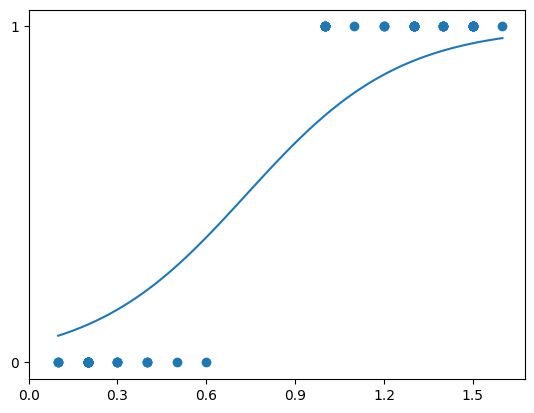

In [14]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [15]:
# Podemos exibir os dados de treino em cima dessa curva
y_curva = expit(w1*X_train+w0)
y_curva

array([0.11281796, 0.73469089, 0.21550308, 0.94998258, 0.92817373,
       0.11281796, 0.21550308, 0.11281796, 0.11281796, 0.11281796,
       0.85677536, 0.11281796, 0.15747043, 0.73469089, 0.11281796,
       0.73469089, 0.07963048, 0.11281796, 0.11281796, 0.15747043,
       0.11281796, 0.11281796, 0.94998258, 0.15747043, 0.89787791,
       0.11281796, 0.89787791, 0.96541627, 0.89787791, 0.94998258,
       0.37241736, 0.92817373, 0.73469089, 0.11281796, 0.94998258,
       0.94998258, 0.89787791, 0.73469089, 0.15747043, 0.89787791,
       0.11281796, 0.80276369, 0.73469089, 0.92817373, 0.07963048,
       0.89787791, 0.92817373, 0.92817373, 0.94998258, 0.07963048,
       0.11281796, 0.11281796, 0.94998258, 0.21550308, 0.11281796,
       0.28762153, 0.89787791, 0.92817373, 0.89787791, 0.94998258,
       0.85677536, 0.11281796, 0.73469089, 0.89787791, 0.11281796,
       0.85677536, 0.94998258])

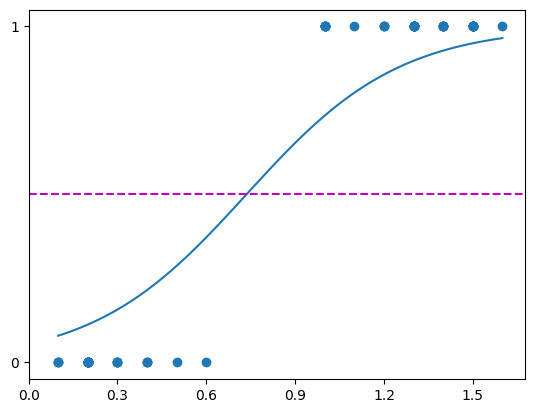

In [16]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)
#ax.scatter(X_train, y_curva)

ax.axhline(y=0.5,c='m',linestyle='--')

#ax.plot([0.1,0.1],[0,expit(w1*0.1+w0)],'--g')
#ax.plot([0.2,0.2],[0,expit(w1*0.2+w0)],'--g')
#ax.plot([0.3,0.3],[0,expit(w1*0.3+w0)],'--g')
#ax.plot([0.4,0.4],[0,expit(w1*0.4+w0)],'--g')
#ax.plot([0.5,0.5],[0,expit(w1*0.5+w0)],'--g')
#ax.plot([0.6,0.6],[0,expit(w1*0.6+w0)],'--g')
#ax.plot([1,1],[expit(w1*1+w0),1],'--g')
#ax.plot([1.1,1.1],[expit(w1*1.1+w0),1],'--g')
#ax.plot([1.2,1.2],[expit(w1*1.2+w0),1],'--g')
#ax.plot([1.3,1.3],[expit(w1*1.3+w0),1],'--g')
#ax.plot([1.4,1.4],[expit(w1*1.4+w0),1],'--g')
#ax.plot([1.5,1.5],[expit(w1*1.5+w0),1],'--g')
#ax.plot([1.6,1.6],[expit(w1*1.6+w0),1],'--g')

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [17]:
clf.predict(X_train.reshape(-1, 1))

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [18]:
# Fazendo a previsão das probabilidades
clf.predict_proba(X_train.reshape(-1, 1))[0:5]

array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [19]:
y_pred = clf.predict_proba(X_test.reshape(-1, 1))
y_pred

array([[0.03458373, 0.96541627],
       [0.10212209, 0.89787791],
       [0.01631239, 0.98368761],
       [0.84252957, 0.15747043],
       [0.78449692, 0.21550308],
       [0.88718204, 0.11281796],
       [0.88718204, 0.11281796],
       [0.19723631, 0.80276369],
       [0.88718204, 0.11281796],
       [0.88718204, 0.11281796],
       [0.84252957, 0.15747043],
       [0.88718204, 0.11281796],
       [0.14322464, 0.85677536],
       [0.88718204, 0.11281796],
       [0.14322464, 0.85677536],
       [0.88718204, 0.11281796],
       [0.07182627, 0.92817373],
       [0.02379309, 0.97620691],
       [0.92036952, 0.07963048],
       [0.78449692, 0.21550308],
       [0.10212209, 0.89787791],
       [0.10212209, 0.89787791],
       [0.78449692, 0.21550308],
       [0.88718204, 0.11281796],
       [0.19723631, 0.80276369],
       [0.78449692, 0.21550308],
       [0.84252957, 0.15747043],
       [0.10212209, 0.89787791],
       [0.92036952, 0.07963048],
       [0.05001742, 0.94998258],
       [0.

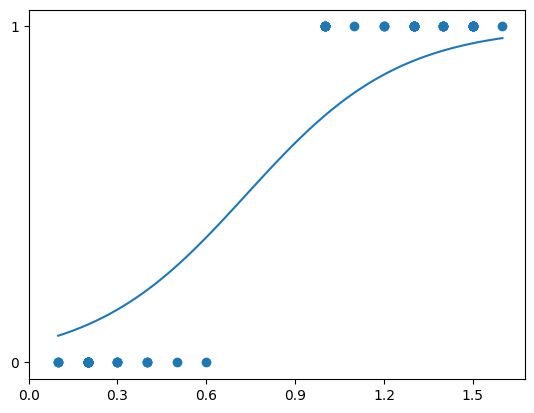

In [24]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)

# Podemos exibir os dados de Teste em cima dessa curva
#ax.scatter(X_test, y_pred[:,1])


ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [25]:
y_pred_valor = clf.predict(X_test.reshape(-1, 1))
print('Valor predito')
print(y_pred_valor)

print( )
print('Valor teste')
print(y_test)
print()
print('Matriz de confusão')
print(confusion_matrix(y_test,y_pred_valor))
print( )
print('classification report')
classificacao1 = classification_report(y_test,clf.predict(X_test.reshape(-1, 1)))
print(classificacao1)

Valor predito
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]

Valor teste
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]

Matriz de confusão
[[19  0]
 [ 0 14]]

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Agora considerando todas as informações da base de dados

In [28]:
X_trainFull, X_testFull, y_trainFull, y_testFull = train_test_split(X, y, test_size=0.2, random_state=42)
clf2= LogisticRegression(random_state=0,max_iter=1000).fit(X_trainFull, y_trainFull)

print(clf2.coef_)
print( )
print(clf2.intercept_)


[[-0.39722222  0.96078798 -2.37395779 -1.00329173]
 [ 0.51294154 -0.25372598 -0.21560233 -0.76901609]
 [-0.11571932 -0.707062    2.58956012  1.77230782]]

[  9.03250813   1.8426525  -10.87516064]


In [29]:
print('Valor predito')
print(clf2.predict(X_testFull))
print( )
print('Probabilidades')
print(clf2.predict_proba(X_testFull))

Valor predito
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Probabilidades
[[3.78540536e-03 8.27210040e-01 1.69004555e-01]
 [9.46727170e-01 5.32726301e-02 1.99986472e-07]
 [8.72385695e-09 1.55691544e-03 9.98443076e-01]
 [6.43448555e-03 7.92126722e-01 2.01438792e-01]
 [1.44095507e-03 7.74344685e-01 2.24214360e-01]
 [9.55768196e-01 4.42316271e-02 1.76849604e-07]
 [7.76122937e-02 9.08082088e-01 1.43056180e-02]
 [1.61401764e-04 1.55690377e-01 8.44148221e-01]
 [2.20736359e-03 7.62834324e-01 2.34958312e-01]
 [2.83154099e-02 9.45798684e-01 2.58859062e-02]
 [4.39679077e-04 2.43281228e-01 7.56279093e-01]
 [9.68307934e-01 3.16919881e-02 7.80649368e-08]
 [9.72933932e-01 2.70660346e-02 3.33361450e-08]
 [9.62096919e-01 3.79029701e-02 1.10921543e-07]
 [9.79272619e-01 2.07273164e-02 6.47441610e-08]
 [4.54276495e-03 7.12605191e-01 2.82852044e-01]
 [7.22631012e-06 2.42037672e-02 9.75789006e-01]
 [2.73294494e-02 9.47693266e-01 2.49772846e-02]
 [8.23322642e-03 8.31120343e-01 1.60646431e-

In [30]:
print('Matriz de confusão')
print(confusion_matrix(y_testFull,clf2.predict(X_testFull)))
print( )
print('classification report')
classificacao = classification_report(y_testFull,clf2.predict(X_testFull))
print(classificacao)

Matriz de confusão
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
#Teste Nova Flor

sepal_length = round(np.random.uniform(4.0,9.0),1)
print('sepal length =',sepal_length,'cm')

sepal_width = round(np.random.uniform(2.0,5.0),1)
print('sepal width =',sepal_width,'cm')

petal_length = round(np.random.uniform(1.0,7.0),1)
print('petal length =',petal_length,'cm')

petal_width = round(np.random.uniform(0.1,3.0),1)
print('petal width =',petal_width,'cm')

Parametros = [[sepal_length,sepal_width,petal_length,petal_width]]
Nova_previsao = clf2.predict(Parametros)
Probabilidade_especie = clf2.predict_proba(Parametros)

print()
print(Probabilidade_especie*10)
print()



# (0) = setosa
# (1) = versicolor
# (2) = virginica

if Nova_previsao == 0:
  print('Setosa')
  #plt.title("Iris Setosa")
  #image = mpimg.imread("/content/Iris_setosa.jpg")
  #image = mpimg.imread("/content/drive/MyDrive/UFRGS/ML 2024.1/Iris_setosa.jpg")
  #plt.imshow(image)
  #plt.show()
else:
  if Nova_previsao == 1:
    print('Versicolor')
    #plt.title("Iris Versicolor")
    #image = mpimg.imread("/content/iris_versicolor.jpeg")
    #image = mpimg.imread("/content/drive/MyDrive/UFRGS/ML 2024.1/iris_versicolor.jpeg")
    #plt.imshow(image)
    #plt.show()
  else:
    print('Virginica')
    #plt.title("Iris Virginica")
    #image = mpimg.imread("/content/iris_virginica.jpeg")
    #image = mpimg.imread("/content/drive/MyDrive/UFRGS/ML 2024.1/iris_virginica.jpeg")
    #plt.imshow(image)
    #plt.show()

sepal length = 7.0 cm
sepal width = 2.4 cm
petal length = 5.7 cm
petal width = 0.2 cm

[[1.53389430e-03 8.46544835e+00 1.53301775e+00]]

Versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Arvores de decisão**
[Decision Trees - scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

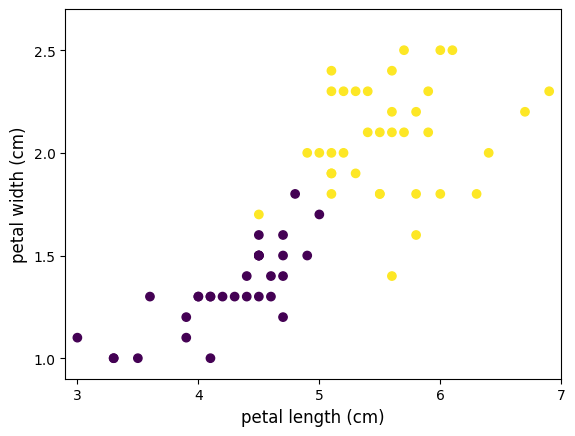

In [37]:
# Selecionando apenas as colunas de pétala e esses targets
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

# Separando X e y
X_DT = iris1.drop('target',axis=1)
y_DT = iris1.target

X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_DT, y_DT, test_size=0.33, random_state=42)

fig, ax = plt.subplots()

ax.scatter(X_trainDT['petal length (cm)'],
           X_trainDT['petal width (cm)'],
           c=y_trainDT)
ax.set_xlabel( "petal length (cm)" , size = 12 )
ax.set_ylabel( "petal width (cm)" , size = 12 )


ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [38]:
# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados de treino
clf = clf.fit(X_trainDT, y_trainDT)

# Verificando o score
clf.score(X_trainDT,y_trainDT)

1.0

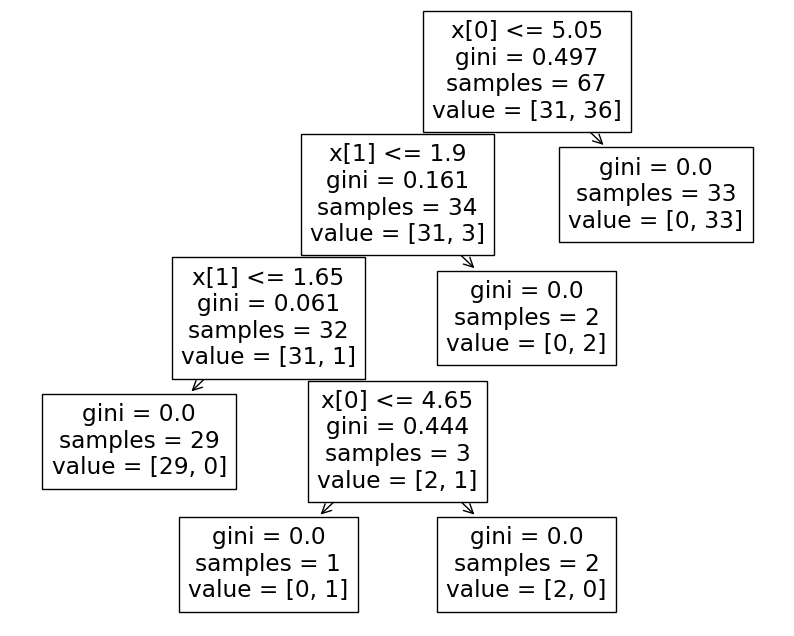

In [39]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf)

plt.show()

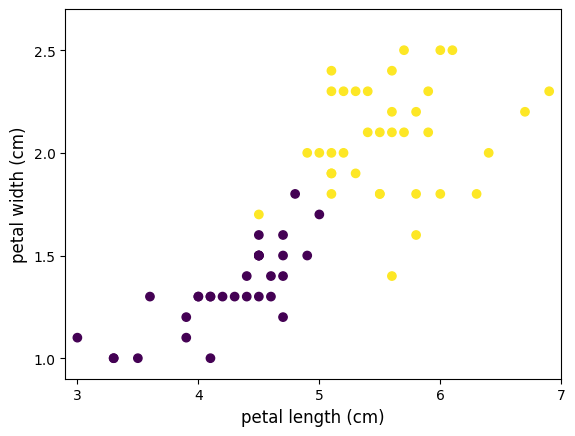

In [42]:
# Podemos adicionar essas regras no nosso gráfico
fig, ax = plt.subplots()

ax.scatter(X_trainDT['petal length (cm)'],
           X_trainDT['petal width (cm)'],
           c=y_trainDT)
ax.set_xlabel( "petal length (cm)" , size = 12 )
ax.set_ylabel( "petal width (cm)" , size = 12 )

#Regras:
#ax.plot([5.05,5.05],[0.9,2.7],'--r')
#ax.plot([2.9,5.05],[1.9,1.9],'--g')
#ax.plot([2.9,5.05],[1.65,1.65],'--b')
#ax.plot([4.65,4.65],[1.65,1.9],'--c')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [43]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_testDT)

confusion_matrix(y_testDT,y_pred)

print(confusion_matrix(y_testDT,y_pred))
print()
print(classification_report(y_testDT,y_pred))

[[18  1]
 [ 6  8]]

              precision    recall  f1-score   support

           1       0.75      0.95      0.84        19
           2       0.89      0.57      0.70        14

    accuracy                           0.79        33
   macro avg       0.82      0.76      0.77        33
weighted avg       0.81      0.79      0.78        33



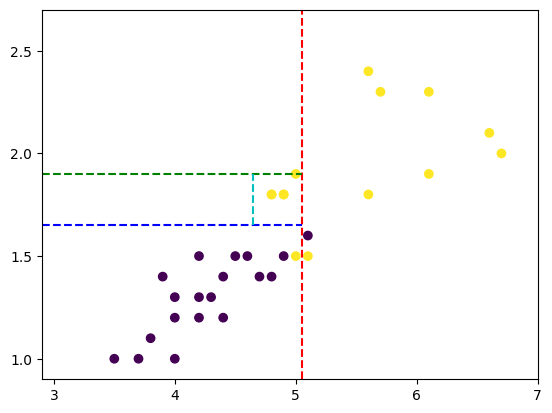

In [44]:
# Visualizando esses dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter(X_testDT['petal length (cm)'],
           X_testDT['petal width (cm)'],
           c=y_testDT)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--g')
ax.plot([2.9,5.05],[1.65,1.65],'--b')
ax.plot([4.65,4.65],[1.65,1.9],'--c')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

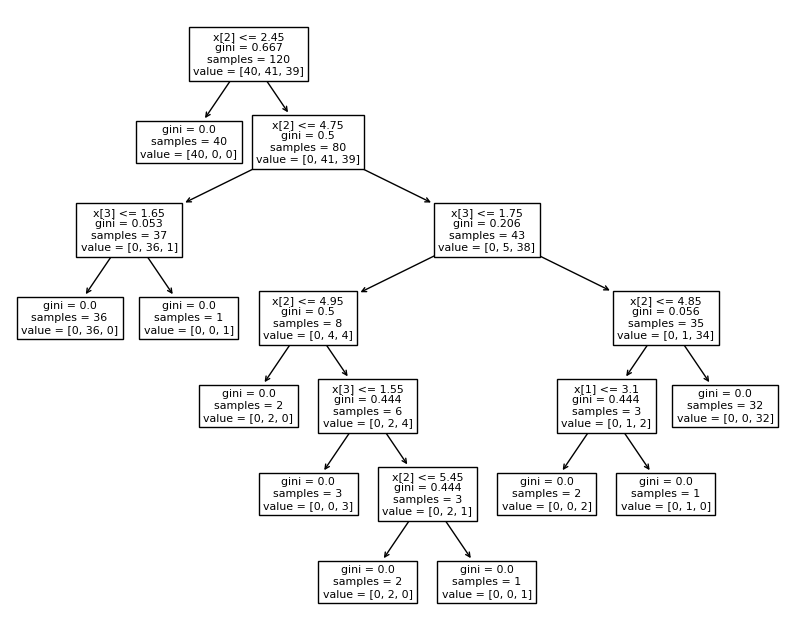

In [45]:
# Separando X e y da base completa
X = iris.drop('target',axis=1)
y = iris.target
X_trainDTFull, X_testDTFull, y_trainDTFull, y_testDTFull = train_test_split(X, y, test_size=0.2, random_state=42)
# Criando o classificador e fazendo o fit
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_trainDTFull,y_trainDTFull)

# Verificando o score
clf2.score(X_trainDTFull,y_trainDTFull)


# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [46]:
# Fazendo a previsão
y_pred2 = clf2.predict(X_testDTFull)

# Avaliando o modelo
print(confusion_matrix(y_testDTFull,y_pred2))
print()
print(classification_report(y_testDTFull,y_pred2))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Exemplo scikit-learn**

Disponível em [Plot the decision surface of decision trees trained on the iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

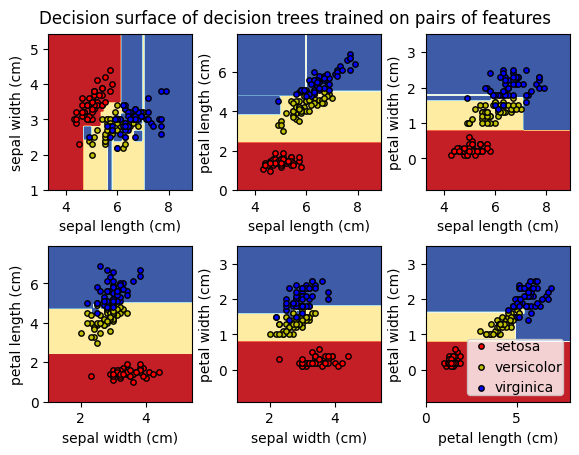

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

#**XGBoost**

[XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)

In [48]:
X_trainXGB, X_testXGB, y_trainXGB, y_testXGB = train_test_split(data['data'], data['target'], test_size=0.2)

clfXGB = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

clfXGB.fit(X_trainXGB, y_trainXGB)

predsXGB = clfXGB.predict(X_testXGB)

In [49]:
print(predsXGB)
print()
print(metrics.confusion_matrix(y_testXGB, predsXGB))
print()
print(metrics.classification_report(y_testXGB, predsXGB))

[2 1 2 0 2 0 1 1 0 0 0 2 0 2 1 0 1 1 0 1 1 2 2 0 2 0 0 2 1 2]

[[10  0  0]
 [ 1  9  0]
 [ 0  0 10]]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

